# Colorado Flood Geotiff Lesson-Open Raster Data in Python

### https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/open-lidar-raster-python/

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box
import fiona
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
# A package created for this class that will be discussed later in this lesson
import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
import seaborn as sns
sns.set(font_scale=1.5, style="white")

# Get data and set wd
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))


In [9]:
# Open raster data
lidar_dem = rio.open(
    'data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')

In [10]:
# Query the spatial extent of the data
lidar_dem.bounds

## BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)


BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)

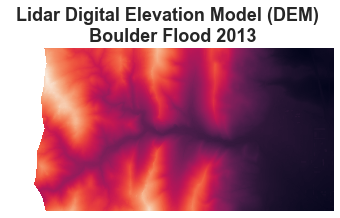

In [11]:
# Plot the dem using raster.io
fig, ax = plt.subplots(figsize = (8,3))
show(lidar_dem, 
     title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013", 
     ax=ax)
ax.set_axis_off()


# Opening and Closing File Connections

The rasterio library is efficient as it establishes a connection with the raster file rather than directly reading it into memory. Because it creates a connection, it is important that you close the connection after it is opened AND after you’ve finished working with the data!

RasterioIOError: Dataset is closed: data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif

## Once the connection is closed, you can no longer work with the data. You’ll need to re-open the connection. Like this:

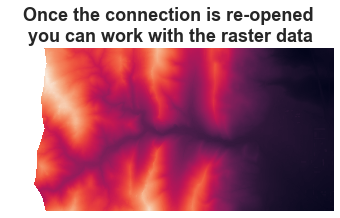

In [13]:
# Open raster data connection - again
lidar_dem = rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')

fig, ax = plt.subplots(figsize = (8,3))
show(lidar_dem, 
     title="Once the connection is re-opened \nyou can work with the raster data", 
     ax=ax)
ax.set_axis_off()

In [15]:
lidar_dem.close()

# Context Manager to Open/Close Raster Data

A better way to work with raster data in rasterio is to use the context manager. This will handle opening and closing the raster file for you.

In [17]:
with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    print(src.bounds)

## BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)

BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)
